<a href="https://colab.research.google.com/github/JuanPabl07DP/ElBalletDelGol/blob/main/ElBalletDelGol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **El Ballet del Gol**

## Desarrollado por: Juan Pablo Daza Pereira y Juan Sebastian Camargo Sanchez

# **Importaciones**

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from math import inf
import random

# **Prueba 1 plantilla 1-4-3-3**


Buscando camino más corto desde el portero al arco contrario...

Iteración 10
Mejor camino encontrado: ['PO', 'CI', 'MI', 'EI', 'G']
Costo: 5

Iteración 20
Mejor camino encontrado: ['PO', 'CI', 'MI', 'EI', 'G']
Costo: 5

Iteración 30
Mejor camino encontrado: ['PO', 'CI', 'MI', 'EI', 'G']
Costo: 5

Iteración 40
Mejor camino encontrado: ['PO', 'CI', 'MI', 'EI', 'G']
Costo: 5

Iteración 50
Mejor camino encontrado: ['PO', 'CI', 'MI', 'EI', 'G']
Costo: 5

Grafo dirigido con mejor camino encontrado hacia el arco contrario (en rojo):


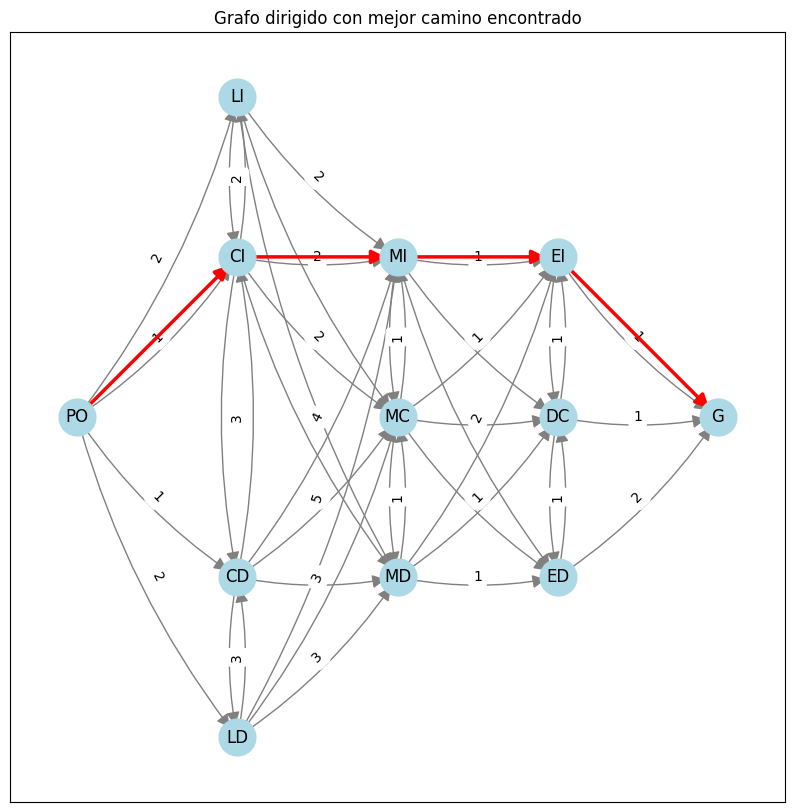


Mejor camino encontrado:
PO --(1)--> CI --(2)--> MI --(1)--> EI --(1)--> G

Costo total: 5


In [ ]:
def ACO(agents, graph, is_start, transitions, tau, ro, is_goal, iterations, print_iter):
    # Usamos DiGraph para grafo dirigido
    G = nx.DiGraph()
    for edge in graph:
        a, b, d = edge
        G.add_edge(a, b, weight=d, pheromone=tau)

    best_path = None
    best_cost = inf

    # Para grafo dirigido, mantenemos el orden original de los nodos
    pheromones = {(a,b): tau for (a,b,_) in graph}

    for iter in range(iterations):
        swarm_paths = []
        swarm_costs = []

        for ant in range(agents):
            current_path = []
            nodes = list(G.nodes())
            start_nodes = [n for n in nodes if is_start(n)]
            if not start_nodes:
                raise ValueError("No se encontraron nodos iniciales")

            current = random.choice(start_nodes)
            current_path.append(current)

            for t in range(transitions):
                if is_goal(current):
                    break

                neighbors = list(G.successors(current))  # Usamos successors en lugar de neighbors
                if not neighbors:
                    break

                probabilities = []
                total_pheromone = 0

                for next_node in neighbors:
                    if next_node not in current_path:
                        edge = (current, next_node)  # Mantenemos el orden
                        pheromone = pheromones[edge]
                        weight = G[current][next_node]['weight']
                        probability = (pheromone) * (1.0/weight)
                        probabilities.append((next_node, probability))
                        total_pheromone += probability

                if not probabilities:
                    break

                if total_pheromone > 0:
                    probabilities = [(node, prob/total_pheromone) for node, prob in probabilities]

                nodes, probs = zip(*probabilities)
                current = np.random.choice(nodes, p=probs)
                current_path.append(current)

            path_cost = 0
            for i in range(len(current_path)-1):
                path_cost += G[current_path[i]][current_path[i+1]]['weight']

            swarm_paths.append(current_path)
            swarm_costs.append(path_cost)

            if path_cost < best_cost and is_goal(current_path[-1]):
                best_path = current_path
                best_cost = path_cost

        for edge in pheromones:
            pheromones[edge] *= (1 - ro)

        for path, path_cost in zip(swarm_paths, swarm_costs):
            if is_goal(path[-1]):
                for i in range(len(path)-1):
                    edge = (path[i], path[i+1])  # Mantenemos el orden
                    pheromones[edge] += tau/path_cost

        if (iter + 1) % print_iter == 0:
            print(f"\nIteración {iter + 1}")
            print(f"Mejor camino encontrado: {best_path}")
            print(f"Costo: {best_cost}")

    final_swarm = nx.DiGraph()  # Grafo dirigido final
    for edge in graph:
        a, b, d = edge
        final_swarm.add_edge(a, b, weight=d, pheromone=pheromones[(a,b)])

    return best_path, final_swarm

def visualize_graph(graph_edges, best_path=None):
    G = nx.DiGraph()  # Usamos DiGraph para grafo dirigido

    # Agregar aristas al grafo
    for start, end, weight in graph_edges:
        G.add_edge(start, end, weight=weight)

    # Definir posiciones fijas para los nodos en forma de cuadrado
    pos = {
        'PO': (0, 0),   # Portero
        'LI': (2, 4),   # Lateral izquierdo
        'CI': (2, 2),   # Central izquierdo
        'CD': (2, -2),  # Central derecho
        'LD': (2, -4),  # Lateral derecho
        'MI': (4, 2),   # Medio centro izquierdo
        'MC': (4, 0),   # Medio centro
        'MD': (4, -2),  # Medio centro derecho
        'EI': (6, 2),   # Extremo izquierdo
        'DC': (6, 0),   # Delantero
        'ED': (6, -2),  # Extremo derecho
        'G': (8, 0)
    }

    plt.figure(figsize=(10, 10))

    # Dibujar aristas con flechas
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1,
                          arrowsize=20, connectionstyle='arc3, rad=0.1')

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)

    # Dibujar etiquetas de nodos
    nx.draw_networkx_labels(G, pos)

    # Dibujar etiquetas de aristas
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    # Dibujar el mejor camino si existe
    if best_path:
        path_edges = list(zip(best_path[:-1], best_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                             edge_color='red', width=2.5,
                             arrowsize=20)

    plt.title("Grafo dirigido con mejor camino encontrado")
    plt.axis('equal')
    plt.show()

def is_start(node):
    return node == "PO"

def is_goal(node):
    return node == "G"

# Crear grafo cuadrado dirigido con pesos diferentes para una formación 1-4-3-3
graph_data = [
    # Posibles pases del portero
    ("PO", "LI", 2), # Portero -> Lateral izquierdo
    ("PO", "CI", 1), # Portero -> Central izquierdo
    ("PO", "CD", 1), # Portero -> Central derecho
    ("PO", "LD", 2), # Portero -> Lateral derecho
    # Posibles pases del lateral izquierdo
    ("LI", "MI", 2), # Lateral izquierdo -> Medio centro izquierdo
    ("LI", "MC", 4), # Lateral izquierdo -> Medio centro
    ("LI", "MD", 4), # Lateral izquierdo -> Medio centro derecho
    ("LI", "CI", 2), # Lateral izquierdo -> Central izquiedo
    # Posibles pases del central izquierdo
    ("CI", "MI", 2), # Central izquierdo -> Medio centro izquierdo
    ("CI", "MC", 2), # Central izquierdo -> Medio centro
    ("CI", "MD", 6), # Central izquierdo -> Medio centro derecho
    ("CI", "LI", 2), # Central izquierdo -> Lateral izquiedo
    ("CI", "CD", 2), # Central izquierdo -> Central derecho
    # Posibles pases del central derecho
    ("CD", "MI", 4), # Central derecho -> Medio centro izquierdo
    ("CD", "MC", 3), # Central derecho -> Medio centro
    ("CD", "MD", 3), # Central derecho -> Medio centro derecho
    ("CD", "CI", 3), # Central derecho -> Central izquierdo
    ("CD", "LD", 3), # Central derecho -> Lateral derecho
    # Posibles pases del lateral derecho
    ("LD", "MI", 5), # Lateral derecho -> Medio centro izquierdo
    ("LD", "MC", 3), # Lateral derecho -> Medio centro
    ("LD", "MD", 3), # Lateral derecho -> Medio centro derecho
    ("LD", "CD", 3), # Lateral derecho -> Central derecho
    # Posibles pases del medio centro izquierdo
    ("MI", "EI", 1), # Medio centro izquierdo -> Extremo izquierdo
    ("MI", "DC", 1), # Medio centro izquierdo -> Delantero
    ("MI", "ED", 3), # Medio centro izquierdo -> Extremo derecho
    ("MI", "MC", 1), # Medio centro izquierdo -> Medio centro
    # Posibles pases del medio centro
    ("MC", "EI", 1), # Medio centro -> Extremo izquierdo
    ("MC", "DC", 1), # Medio centro -> Delantero
    ("MC", "ED", 1), # Medio centro -> Extremo derecho
    ("MC", "MI", 1), # Medio centro  -> Medio centro izquierdo
    ("MC", "MD", 1), # Medio centro izquierdo -> Medio centro derecho
    # Posibles pases del medio centro derecho
    ("MD", "EI", 2), # Medio centro derecho -> Extremo izquierdo
    ("MD", "DC", 1), # Medio centro derecho -> Delantero
    ("MD", "ED", 1), # Medio centro derecho -> Extremo derecho
    ("MD", "MC", 1), # Medio centro derecho -> Medio centro
    # Posibles pases del extremo izquierdo
    ("EI", "G", 1), # Extremo izquierdo -> Arco contrario
    ("EI", "DC", 1), # Extremo izquierdo -> Delantero
    # Posibles pases del delantero
    ("DC", "G", 1), # Delantero -> Arco contrario
    ("DC", "EI", 1), # Delantero -> Extremo izquierdo
    ("DC", "ED", 1), # Delantero -> Extremo derecho
    # Posibles pases del extremo izquierdo
    ("ED", "G", 2), # Extremo derecho -> Arco contrario
    ("ED", "DC", 1)  # Extremo derecho -> Delantero
]

# Ejecutar ACO
print("\nBuscando camino más corto desde el portero al arco contrario...")
best_path, final_swarm = ACO(
    agents=10,
    graph=graph_data,
    is_start=is_start,
    transitions=10,
    tau=1.0,
    ro=0.1,
    is_goal=is_goal,
    iterations=50,
    print_iter=10
)

# Visualizar resultado final
print("\nGrafo dirigido con mejor camino encontrado hacia el arco contrario (en rojo):")
visualize_graph(graph_data, best_path)

if best_path:
    # Calcular costo total
    total_cost = 0
    print("\nMejor camino encontrado:")
    for i, node in enumerate(best_path):
        if i < len(best_path) - 1:
            cost = final_swarm[best_path[i]][best_path[i+1]]['weight']
            total_cost += cost
            print(f"{node} --({cost})--> ", end="")
        else:
            print(node)
    print(f"\nCosto total: {total_cost}")

# **Estadísiticas jugadores**

In [ ]:
# Estadísticas de los jugadores
PLAYER_STATS = {
    "Lunin" : {
        "Short Passing" : 25,
        "Long Passing" : 26,
        "Vision" : 60,
        "Ball Control": 15,
        "Shooting" : 0
    },
    "Carvajal" : {
        "Short Passing" : 84,
        "Long Passing" : 74,
        "Vision" : 78,
        "Ball Control": 85,
        "Shooting" : 0
    },
    "Militao" : {
        "Short Passing" : 78,
        "Long Passing" : 76,
        "Vision" : 59,
        "Ball Control": 72,
        "Shooting" : 0
    },
    "Rüdiger" : {
        "Short Passing" : 84,
        "Long Passing" : 81,
        "Vision" : 61,
        "Ball Control": 74,
        "Shooting" : 0
    },
    "Mendy" : {
        "Short Passing" : 80,
        "Long Passing" : 77,
        "Vision" : 75,
        "Ball Control": 76,
        "Shooting" : 0
    },
    "Bellingham" : {
        "Short Passing" : 89,
        "Long Passing" : 89,
        "Vision" : 90,
        "Ball Control": 89,
        "Shooting" : 0
    },
    "Tchouameni" : {
        "Short Passing" : 85,
        "Long Passing" : 84,
        "Vision" : 82,
        "Ball Control": 81,
        "Shooting" : 0
    },
    "Valverde" : {
        "Short Passing" : 87,
        "Long Passing" : 88,
        "Vision" : 86,
        "Ball Control": 88,
        "Shooting" : 0
    },
    "Vinicius" : {
        "Short Passing" : 83,
        "Long Passing" : 77,
        "Vision" : 85,
        "Ball Control": 90,
        "Shooting" : 84
    },
    "Mbappé" : {
        "Short Passing" : 86,
        "Long Passing" : 71,
        "Vision" : 83,
        "Ball Control": 92,
        "Shooting" : 90
    },
    "Rodrygo" : {
        "Short Passing" : 80,
        "Long Passing" : 73,
        "Vision" : 83,
        "Ball Control": 87,
        "Shooting" : 81
    },
    #Banco
    "Modric" : {
        "Short Passing" : 90,
        "Long Passing" : 90,
        "Vision" : 90,
        "Ball Control": 90,
        "Shooting" : 0
    },
    "Camavinga" : {
        "Short Passing" : 86,
        "Long Passing" : 84,
        "Vision" : 83,
        "Ball Control": 86,
        "Shooting" : 0
    },
    "Güler" : {
        "Short Passing" : 81,
        "Long Passing" : 79,
        "Vision" : 80,
        "Ball Control": 82,
        "Shooting" : 0
    },
    "Ronaldo" : {
        "Short Passing" : 99,
        "Long Passing" : 99,
        "Vision" : 99,
        "Ball Control": 99,
        "Shooting" : 99
    }
}

# **Prueba 2 con plantilla 1-4-3-3**

In [ ]:
# Posiciones de los jugadores
PLAYER_POSITIONS = {
    "Lunin" : "PO",
    "Carvajal" : "LD",
    "Militao" : "CI",
    "Rüdiger" : "CD",
    "Mendy" : "LI",
    "Bellingham" : "MI",
    "Tchouameni" : "MC",
    "Valverde" : "MD",
    "Vinicius" : "EI",
    "Mbappé" : "DC",
    "Rodrygo" : "ED"
}

In [ ]:
def calculate_goal_probability(player_stats):
    shooting = player_stats["Shooting"]
    ball_control = player_stats["Ball Control"]
    vision = player_stats["Vision"]

    # Fórmula para la probabilidad de gol
    # 60% shooting, 25% ball control, 15% vision
    goal_probability = (shooting * 0.6 + ball_control * 0.25 + vision * 0.15) / 100.0

    return goal_probability

In [ ]:
def calculate_pass_weight(from_player_stats, to_player_stats, pass_type):
    if pass_type == "long":
        # Peso del pasador (70% del total)
        passer_weight = (
            from_player_stats["Long Passing"] * 0.4 +
            from_player_stats["Vision"] * 0.3 +
            from_player_stats["Short Passing"] * 0.3
        ) * 0.7

        # Peso del receptor (30% del total)
        receiver_weight = (
            to_player_stats["Ball Control"] * 0.5 +
            to_player_stats["Vision"] * 0.3 +
            to_player_stats["Short Passing"] * 0.2
        ) * 0.3

    else:  # short
        # Peso del pasador (70% del total)
        passer_weight = (
            from_player_stats["Short Passing"] * 0.5 +
            from_player_stats["Vision"] * 0.3 +
            from_player_stats["Ball Control"] * 0.2
        ) * 0.7

        # Peso del receptor (30% del total)
        receiver_weight = (
            to_player_stats["Ball Control"] * 0.6 +
            to_player_stats["Vision"] * 0.4
        ) * 0.3

    return 100 - (passer_weight + receiver_weight)

In [ ]:
def ACO(agents, graph, is_start, transitions, tau, ro, is_goal, iterations, print_iter):
    G = nx.DiGraph()
    for edge in graph:
        a, b, d = edge
        G.add_edge(a, b, weight=d, pheromone=tau)

    best_path = None
    best_cost = inf
    pheromones = {(a,b): tau for (a,b,_) in graph}

    for iter in range(iterations):
        swarm_paths = []
        swarm_costs = []

        for ant in range(agents):
            current_path = []
            nodes = list(G.nodes())
            start_nodes = [n for n in nodes if is_start(n)]
            if not start_nodes:
                raise ValueError("No se encontraron nodos iniciales")

            current = random.choice(start_nodes)
            current_path.append(current)

            for t in range(transitions):
                if is_goal(current):
                    break

                neighbors = list(G.successors(current))
                if not neighbors:
                    break

                probabilities = []
                total_pheromone = 0

                for next_node in neighbors:
                    if next_node not in current_path:
                        edge = (current, next_node)
                        pheromone = pheromones[edge]
                        weight = G[current][next_node]['weight']
                        probability = (pheromone) * (1.0/weight)
                        probabilities.append((next_node, probability))
                        total_pheromone += probability

                if not probabilities:
                    break

                if total_pheromone > 0:
                    probabilities = [(node, prob/total_pheromone) for node, prob in probabilities]

                nodes, probs = zip(*probabilities)
                current = np.random.choice(nodes, p=probs)
                current_path.append(current)

            path_cost = 0
            for i in range(len(current_path)-1):
                path_cost += G[current_path[i]][current_path[i+1]]['weight']

            swarm_paths.append(current_path)
            swarm_costs.append(path_cost)

            if path_cost < best_cost and is_goal(current_path[-1]):
                best_path = current_path
                best_cost = path_cost

        for edge in pheromones:
            pheromones[edge] *= (1 - ro)

        for path, path_cost in zip(swarm_paths, swarm_costs):
            if is_goal(path[-1]):
                for i in range(len(path)-1):
                    edge = (path[i], path[i+1])
                    pheromones[edge] += tau/path_cost

        if (iter + 1) % print_iter == 0:
            print(f"\nIteración {iter + 1}")
            print(f"Mejor camino encontrado: {best_path}")
            print(f"Costo: {best_cost}")

    final_swarm = nx.DiGraph()
    for edge in graph:
        a, b, d = edge
        final_swarm.add_edge(a, b, weight=d, pheromone=pheromones[(a,b)])

    return best_path, final_swarm

In [ ]:
def generate_graph_data():
    graph_data = []
    goal_probabilities = {}
    # Definir las conexiones posibles con los jugadores asignados
    connections = [
        # Desde el portero
        ("PO", "LI", "Lunin", "long"),
        ("PO", "CI", "Lunin", "short"),
        ("PO", "CD", "Lunin", "short"),
        ("PO", "LD", "Lunin", "long"),

        # Desde defensas
        ("LI", "MI", "Mendy", "short"),
        ("LI", "MC", "Mendy", "long"),
        ("LI", "CI", "Mendy", "short"),

        ("CI", "MI", "Militao", "short"),
        ("CI", "MC", "Militao", "short"),
        ("CI", "CD", "Militao", "short"),
        ("CI", "LI", "Militao", "short"),

        ("CD", "MD", "Rüdiger", "short"),
        ("CD", "MC", "Rüdiger", "short"),
        ("CD", "LD", "Rüdiger", "short"),
        ("CD", "CI", "Rüdiger", "short"),

        ("LD", "MD", "Carvajal", "short"),
        ("LD", "MC", "Carvajal", "long"),
        ("LD", "CD", "Carvajal", "short"),

        # Desde mediocampo
        ("MI", "EI", "Bellingham", "short"),
        ("MI", "DC", "Bellingham", "short"),
        ("MI", "MC", "Bellingham", "short"),

        ("MC", "EI", "Tchouameni", "long"),
        ("MC", "DC", "Tchouameni", "short"),
        ("MC", "ED", "Tchouameni", "long"),
        ("MC", "MI", "Tchouameni", "short"),
        ("MC", "MD", "Tchouameni", "short"),

        ("MD", "ED", "Valverde", "short"),
        ("MD", "DC", "Valverde", "short"),
        ("MD", "MC", "Valverde", "short"),

        # Desde delanteros
        ("EI", "G", "Vinicius", "shoot"),
        ("EI", "DC", "Vinicius", "short"),

        ("DC", "G", "Mbappé", "shoot"),
        ("DC", "EI", "Mbappé", "short"),
        ("DC", "ED", "Mbappé", "short"),

        ("ED", "G", "Rodrygo", "shoot"),
        ("ED", "DC", "Rodrygo", "short")
    ]

    for from_pos, to_pos, player, pass_type in connections:
        from_stats = PLAYER_STATS[player]

        if to_pos != "G":  # Si no es tiro a gol
            # Encontrar el jugador que recibe el pase
            to_player = next(name for name, pos in PLAYER_POSITIONS.items() if pos == to_pos)
            to_stats = PLAYER_STATS[to_player]

            # Calcular el peso considerando ambos jugadores
            weight = calculate_pass_weight(from_stats, to_stats, pass_type)

        else:  # Si es tiro a gol
            prob_goal = calculate_goal_probability(from_stats)
            goal_probabilities[(from_pos, to_pos)] = prob_goal
            weight = 100 - (prob_goal * 100)

        graph_data.append((from_pos, to_pos, weight))

    return graph_data, goal_probabilities

In [ ]:
def visualize_graph(graph_edges, best_path=None, goal_probabilities=None):
    G = nx.DiGraph()

    for start, end, weight in graph_edges:
        G.add_edge(start, end, weight=weight)

    pos = {
        'PO': (0, 0),    # Portero
        'LI': (2, 4),    # Lateral izquierdo
        'CI': (2, 2),    # Central izquierdo
        'CD': (2, -2),   # Central derecho
        'LD': (2, -4),   # Lateral derecho
        'MI': (4, 2),    # Medio centro izquierdo
        'MC': (4, 0),    # Medio centro
        'MD': (4, -2),   # Medio centro derecho
        'EI': (6, 2),    # Extremo izquierdo
        'DC': (6, 0),    # Delantero
        'ED': (6, -2),   # Extremo derecho
        'G': (8, 0)      # Gol
    }

    plt.figure(figsize=(15, 10))

    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1,
                          arrowsize=20, connectionstyle='arc3, rad=0.1')

    nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                          node_size=1500)

    labels = {}
    for pos_code, position in pos.items():
        player_name = next((name for name, pos in PLAYER_POSITIONS.items() if pos == pos_code), pos_code)
        if pos_code != 'G':
            labels[pos_code] = f"{pos_code}\n{player_name}"
        else:
            labels[pos_code] = "GOL"

    nx.draw_networkx_labels(G, pos, labels, font_size=8)

    # Modificar las etiquetas de las aristas para incluir probabilidades de gol
    edge_labels = {}
    for (start, end), weight in nx.get_edge_attributes(G, 'weight').items():
        if end == 'G' and goal_probabilities:
            prob = goal_probabilities.get((start, end), 0) * 100
            edge_labels[(start, end)] = f"{weight:.1f}\n({prob:.1f}%)"
        else:
            edge_labels[(start, end)] = f"{weight:.1f}"

    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=7)

    if best_path:
        path_edges = list(zip(best_path[:-1], best_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                             edge_color='red', width=2.5,
                             arrowsize=20)

    plt.title("Real Madrid (4-3-3) - Mejor ruta de ataque")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def is_start(node):
    return node == "PO"

def is_goal(node):
    return node == "G"


Generando grafo con estadísticas...

Ejecutando algoritmo ACO...

Iteración 20
Mejor camino encontrado: ['PO', 'LD', 'MD', 'DC', 'G']
Costo: 89.42

Iteración 40
Mejor camino encontrado: ['PO', 'LD', 'MD', 'DC', 'G']
Costo: 89.42

Iteración 60
Mejor camino encontrado: ['PO', 'LD', 'MD', 'DC', 'G']
Costo: 89.42

Iteración 80
Mejor camino encontrado: ['PO', 'LD', 'MD', 'DC', 'G']
Costo: 89.42

Iteración 100
Mejor camino encontrado: ['PO', 'LD', 'MD', 'DC', 'G']
Costo: 89.42

Visualizando resultados...


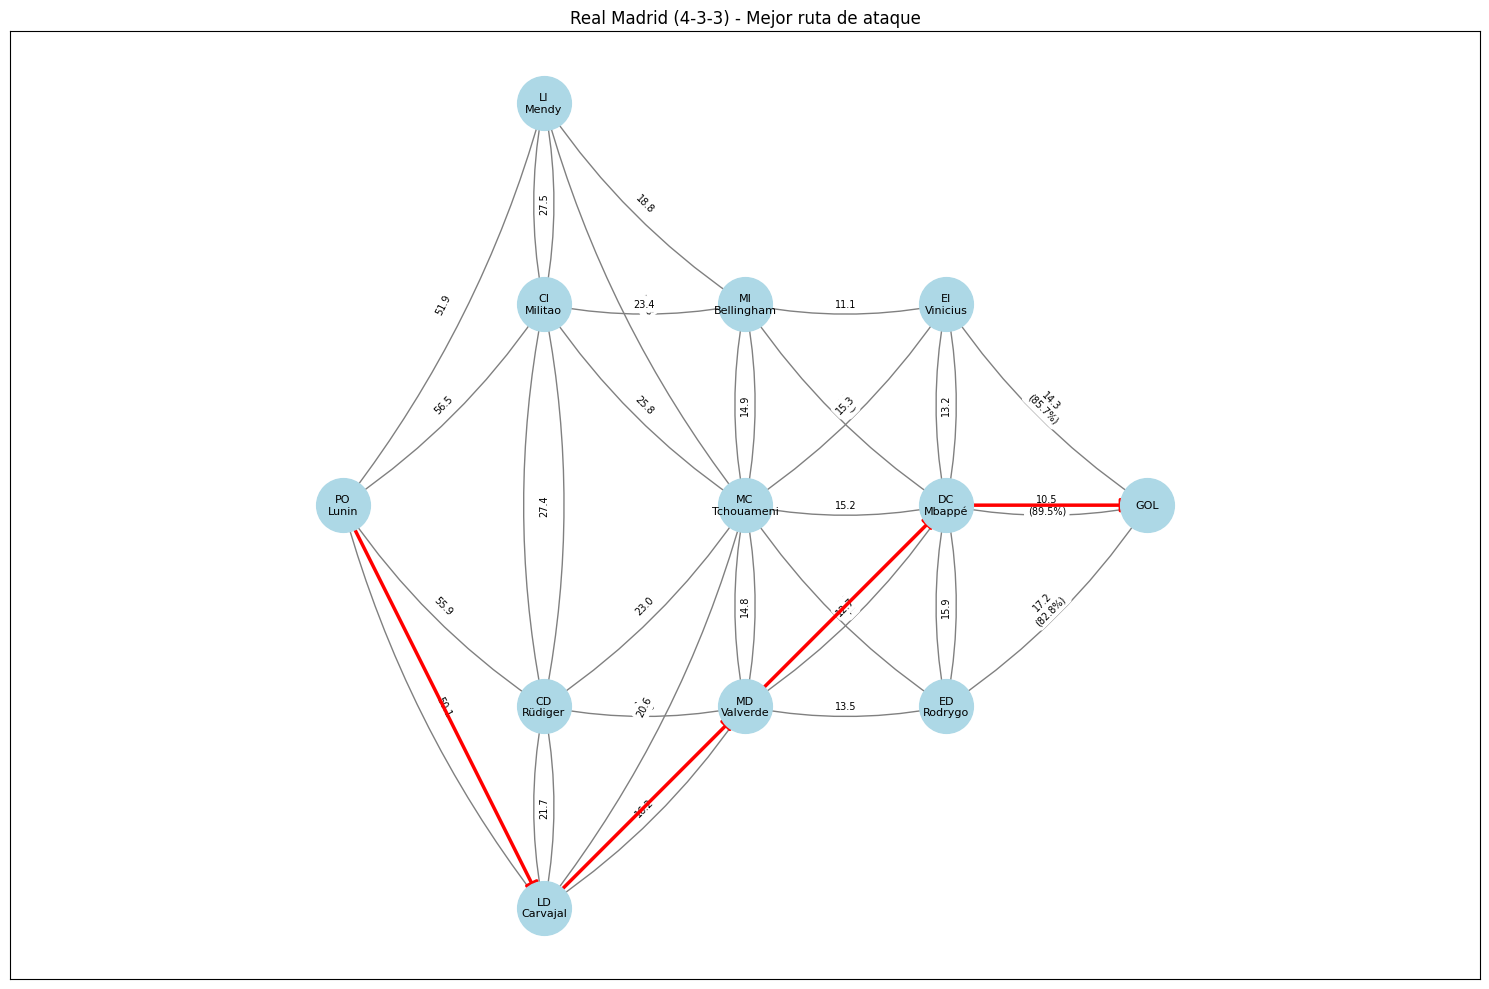


Mejor ruta encontrada:
PO (Lunin) --(50.1)--> LD (Carvajal) --(16.2)--> MD (Valverde) --(12.7)--> DC (Mbappé) --(10.5)--> G [Prob. Gol: 89.5%]
Peso total de la ruta: 89.4
Probabilidad de gol para el tiro final: 89.5%


In [ ]:
def main():
    print("\nGenerando grafo con estadísticas...")
    graph_data, goal_probabilities = generate_graph_data()

    print("\nEjecutando algoritmo ACO...")
    best_path, final_swarm = ACO(
        agents=15,
        graph=graph_data,
        is_start=is_start,
        transitions=12,
        tau=1.5,
        ro=0.15,
        is_goal=is_goal,
        iterations=100,
        print_iter=20
    )

    print("\nVisualizando resultados...")
    visualize_graph(graph_data, best_path, goal_probabilities)

    if best_path:
        print("\nMejor ruta encontrada:")
        total_weight = 0
        for i in range(len(best_path)-1):
            for from_pos, to_pos, weight in graph_data:
                if from_pos == best_path[i] and to_pos == best_path[i+1]:
                    total_weight += weight
                    player = next(name for name, pos in PLAYER_POSITIONS.items() if pos == from_pos)

                    # Si es un tiro a gol, mostrar la probabilidad
                    if to_pos == "G":
                        prob = goal_probabilities.get((from_pos, to_pos), 0) * 100
                        print(f"{from_pos} ({player}) --({weight:.1f})--> {to_pos} [Prob. Gol: {prob:.1f}%]", end="")
                    else:
                        print(f"{from_pos} ({player}) --({weight:.1f})--> ", end="")
                    break

        if best_path[-1] != "G":
            print(f"{best_path[-1]}")

        print(f"\nPeso total de la ruta: {total_weight:.1f}")

        # Calcular probabilidad de gol para la ruta completa
        if best_path[-1] == "G":
            final_shot = (best_path[-2], "G")
            final_prob = goal_probabilities.get(final_shot, 0) * 100
            print(f"Probabilidad de gol para el tiro final: {final_prob:.1f}%")

    return best_path, final_swarm, graph_data, goal_probabilities

if __name__ == "__main__":
    best_path, final_swarm, graph_data, goal_probabilities = main()

# **Prueba 3. Con cambios**

In [ ]:
# Posiciones de los jugadores
PLAYER_POSITIONS = {
    "Lunin" : "PO",
    "Carvajal" : "LD",
    "Militao" : "CI",
    "Rüdiger" : "CD",
    "Mendy" : "LI",
    "Camavinga" : "MI",
    "Modric" : "MC",
    "Güler" : "MD",
    "Vinicius" : "EI",
    "Mbappé" : "DC",
    "Rodrygo" : "ED"
}

In [ ]:
def generate_graph_data():
    graph_data = []

    # Definir las conexiones posibles con los jugadores asignados
    connections = [
        # Desde el portero
        ("PO", "LI", "Lunin", "long"),
        ("PO", "CI", "Lunin", "short"),
        ("PO", "CD", "Lunin", "short"),
        ("PO", "LD", "Lunin", "long"),

        # Desde defensas
        ("LI", "MI", "Mendy", "short"),
        ("LI", "MC", "Mendy", "long"),
        ("LI", "CI", "Mendy", "short"),

        ("CI", "MI", "Militao", "short"),
        ("CI", "MC", "Militao", "short"),
        ("CI", "CD", "Militao", "short"),
        ("CI", "LI", "Militao", "short"),

        ("CD", "MD", "Rüdiger", "short"),
        ("CD", "MC", "Rüdiger", "short"),
        ("CD", "LD", "Rüdiger", "short"),
        ("CD", "CI", "Rüdiger", "short"),

        ("LD", "MD", "Carvajal", "short"),
        ("LD", "MC", "Carvajal", "long"),
        ("LD", "CD", "Carvajal", "short"),

        # Desde mediocampo
        ("MI", "EI", "Camavinga", "short"),
        ("MI", "DC", "Camavinga", "short"),
        ("MI", "MC", "Camavinga", "short"),

        ("MC", "EI", "Modric", "long"),
        ("MC", "DC", "Modric", "short"),
        ("MC", "ED", "Modric", "long"),
        ("MC", "MI", "Modric", "short"),
        ("MC", "MD", "Modric", "short"),

        ("MD", "ED", "Güler", "short"),
        ("MD", "DC", "Güler", "short"),
        ("MD", "MC", "Güler", "short"),

        # Desde delanteros
        ("EI", "G", "Vinicius", "shoot"),
        ("EI", "DC", "Vinicius", "short"),

        ("DC", "G", "Mbappé", "shoot"),
        ("DC", "EI", "Mbappé", "short"),
        ("DC", "ED", "Mbappé", "short"),

        ("ED", "G", "Rodrygo", "shoot"),
        ("ED", "DC", "Rodrygo", "short")
    ]

    for from_pos, to_pos, player, pass_type in connections:
        from_stats = PLAYER_STATS[player]

        if to_pos != "G":  # Si no es tiro a gol
            # Encontrar el jugador que recibe el pase
            to_player = next(name for name, pos in PLAYER_POSITIONS.items() if pos == to_pos)
            to_stats = PLAYER_STATS[to_player]

            # Calcular el peso considerando ambos jugadores
            weight = calculate_pass_weight(from_stats, to_stats, pass_type)

        else:  # Si es tiro a gol
            prob_goal = calculate_goal_probability(from_stats)
            goal_probabilities[(from_pos, to_pos)] = prob_goal
            weight = 100 - (prob_goal * 100)

        graph_data.append((from_pos, to_pos, weight))

    return graph_data, goal_probabilities

In [ ]:
def ACO(agents, graph, is_start, transitions, tau, ro, is_goal, iterations, print_iter):
    G = nx.DiGraph()
    for edge in graph:
        a, b, d = edge
        G.add_edge(a, b, weight=d, pheromone=tau)

    best_path = None
    best_cost = inf
    pheromones = {(a,b): tau for (a,b,_) in graph}

    for iter in range(iterations):
        swarm_paths = []
        swarm_costs = []

        for ant in range(agents):
            current_path = []
            nodes = list(G.nodes())
            start_nodes = [n for n in nodes if is_start(n)]
            if not start_nodes:
                raise ValueError("No se encontraron nodos iniciales")

            current = random.choice(start_nodes)
            current_path.append(current)

            for t in range(transitions):
                if is_goal(current):
                    break

                neighbors = list(G.successors(current))
                if not neighbors:
                    break

                probabilities = []
                total_pheromone = 0

                for next_node in neighbors:
                    if next_node not in current_path:
                        edge = (current, next_node)
                        pheromone = pheromones[edge]
                        weight = G[current][next_node]['weight']
                        probability = (pheromone) * (1.0/weight)
                        probabilities.append((next_node, probability))
                        total_pheromone += probability

                if not probabilities:
                    break

                if total_pheromone > 0:
                    probabilities = [(node, prob/total_pheromone) for node, prob in probabilities]

                nodes, probs = zip(*probabilities)
                current = np.random.choice(nodes, p=probs)
                current_path.append(current)

            path_cost = 0
            for i in range(len(current_path)-1):
                path_cost += G[current_path[i]][current_path[i+1]]['weight']

            swarm_paths.append(current_path)
            swarm_costs.append(path_cost)

            if path_cost < best_cost and is_goal(current_path[-1]):
                best_path = current_path
                best_cost = path_cost

        for edge in pheromones:
            pheromones[edge] *= (1 - ro)

        for path, path_cost in zip(swarm_paths, swarm_costs):
            if is_goal(path[-1]):
                for i in range(len(path)-1):
                    edge = (path[i], path[i+1])
                    pheromones[edge] += tau/path_cost

        if (iter + 1) % print_iter == 0:
            print(f"\nIteración {iter + 1}")
            print(f"Mejor camino encontrado: {best_path}")
            print(f"Costo: {best_cost}")

    final_swarm = nx.DiGraph()
    for edge in graph:
        a, b, d = edge
        final_swarm.add_edge(a, b, weight=d, pheromone=pheromones[(a,b)])

    return best_path, final_swarm

In [ ]:
def visualize_graph(graph_edges, best_path=None, goal_probabilities=None):
    G = nx.DiGraph()

    for start, end, weight in graph_edges:
        G.add_edge(start, end, weight=weight)

    pos = {
        'PO': (0, 0),    # Portero
        'LI': (2, 4),    # Lateral izquierdo
        'CI': (2, 2),    # Central izquierdo
        'CD': (2, -2),   # Central derecho
        'LD': (2, -4),   # Lateral derecho
        'MI': (4, 2),    # Medio centro izquierdo
        'MC': (4, 0),    # Medio centro
        'MD': (4, -2),   # Medio centro derecho
        'EI': (6, 2),    # Extremo izquierdo
        'DC': (6, 0),    # Delantero
        'ED': (6, -2),   # Extremo derecho
        'G': (8, 0)      # Gol
    }

    plt.figure(figsize=(15, 10))

    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1,
                          arrowsize=20, connectionstyle='arc3, rad=0.1')

    nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                          node_size=1500)

    labels = {}
    for pos_code, position in pos.items():
        player_name = next((name for name, pos in PLAYER_POSITIONS.items() if pos == pos_code), pos_code)
        if pos_code != 'G':
            labels[pos_code] = f"{pos_code}\n{player_name}"
        else:
            labels[pos_code] = "GOL"

    nx.draw_networkx_labels(G, pos, labels, font_size=8)

    # Modificar las etiquetas de las aristas para incluir probabilidades de gol
    edge_labels = {}
    for (start, end), weight in nx.get_edge_attributes(G, 'weight').items():
        if end == 'G' and goal_probabilities:
            prob = goal_probabilities.get((start, end), 0) * 100
            edge_labels[(start, end)] = f"{weight:.1f}\n({prob:.1f}%)"
        else:
            edge_labels[(start, end)] = f"{weight:.1f}"

    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=7)

    if best_path:
        path_edges = list(zip(best_path[:-1], best_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                             edge_color='red', width=2.5,
                             arrowsize=20)

    plt.title("Real Madrid (4-3-3) - Mejor ruta de ataque")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def is_start(node):
    return node == "PO"

def is_goal(node):
    return node == "G"


Generando grafo con estadísticas...

Ejecutando algoritmo ACO...

Iteración 20
Mejor camino encontrado: ['PO', 'LD', 'MC', 'DC', 'G']
Costo: 89.35

Iteración 40
Mejor camino encontrado: ['PO', 'LD', 'MC', 'DC', 'G']
Costo: 89.35

Iteración 60
Mejor camino encontrado: ['PO', 'LD', 'MC', 'DC', 'G']
Costo: 89.35

Iteración 80
Mejor camino encontrado: ['PO', 'LD', 'MC', 'DC', 'G']
Costo: 89.35

Iteración 100
Mejor camino encontrado: ['PO', 'LD', 'MC', 'DC', 'G']
Costo: 89.35

Visualizando resultados...


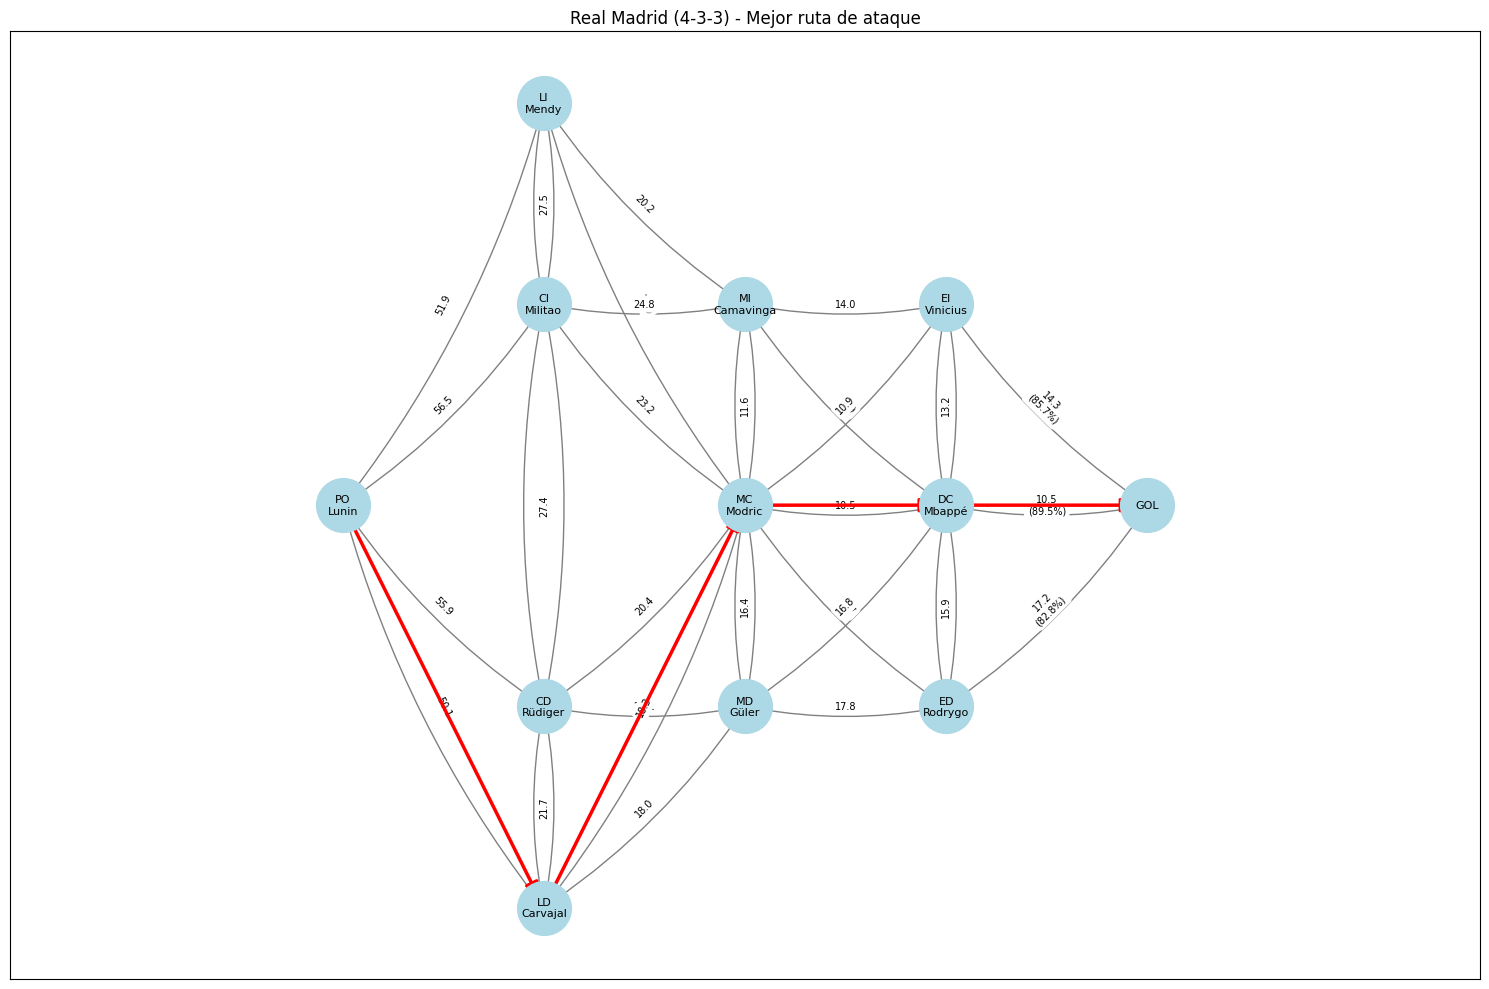


Mejor ruta encontrada:
PO (Lunin) --(50.1)--> LD (Carvajal) --(18.3)--> MC (Modric) --(10.5)--> DC (Mbappé) --(10.5)--> G [Prob. Gol: 89.5%]
Peso total de la ruta: 89.3
Probabilidad de gol para el tiro final: 89.5%


In [ ]:
def main():
    print("\nGenerando grafo con estadísticas...")
    graph_data, goal_probabilities = generate_graph_data()

    print("\nEjecutando algoritmo ACO...")
    best_path, final_swarm = ACO(
        agents=15,
        graph=graph_data,
        is_start=is_start,
        transitions=12,
        tau=1.5,
        ro=0.15,
        is_goal=is_goal,
        iterations=100,
        print_iter=20
    )

    print("\nVisualizando resultados...")
    visualize_graph(graph_data, best_path, goal_probabilities)

    if best_path:
        print("\nMejor ruta encontrada:")
        total_weight = 0
        for i in range(len(best_path)-1):
            for from_pos, to_pos, weight in graph_data:
                if from_pos == best_path[i] and to_pos == best_path[i+1]:
                    total_weight += weight
                    player = next(name for name, pos in PLAYER_POSITIONS.items() if pos == from_pos)

                    # Si es un tiro a gol, mostrar la probabilidad
                    if to_pos == "G":
                        prob = goal_probabilities.get((from_pos, to_pos), 0) * 100
                        print(f"{from_pos} ({player}) --({weight:.1f})--> {to_pos} [Prob. Gol: {prob:.1f}%]", end="")
                    else:
                        print(f"{from_pos} ({player}) --({weight:.1f})--> ", end="")
                    break

        if best_path[-1] != "G":
            print(f"{best_path[-1]}")

        print(f"\nPeso total de la ruta: {total_weight:.1f}")

        # Calcular probabilidad de gol para la ruta completa
        if best_path[-1] == "G":
            final_shot = (best_path[-2], "G")
            final_prob = goal_probabilities.get(final_shot, 0) * 100
            print(f"Probabilidad de gol para el tiro final: {final_prob:.1f}%")

    return best_path, final_swarm, graph_data, goal_probabilities

if __name__ == "__main__":
    best_path, final_swarm, graph_data, goal_probabilities = main()

# **Prueba 4. Nueva distribución 1-4-2-3-1**

In [ ]:
PLAYER_POSITIONS = {
    "Lunin" : "PO",
    "Carvajal" : "LD",
    "Militao" : "CD",
    "Rüdiger" : "CI",
    "Mendy" : "LI",
    "Modric" : "MCD",
    "Camavinga" : "MCI",
    "Rodrygo" : "ED",
    "Güler" : "MCO",
    "Vinicius" : "EI",
    "Mbappé" : "DC"
}

In [ ]:
def generate_graph_data():
    graph_data = []
    goal_probabilities = {}

    # Definir las conexiones para 4-2-3-1
    connections = [
        # Desde el portero
        ("PO", "LI", "Lunin", "long"),
        ("PO", "CI", "Lunin", "short"),
        ("PO", "CD", "Lunin", "short"),
        ("PO", "LD", "Lunin", "long"),

        # Desde defensas laterales
        ("LI", "MCD", "Mendy", "long"),
        ("LI", "MCI", "Mendy", "short"),
        ("LI", "CI", "Mendy", "short"),

        ("LD", "MCI", "Carvajal", "long"),
        ("LD", "MCD", "Carvajal", "short"),
        ("LD", "CD", "Carvajal", "short"),

        # Desde centrales
        ("CI", "MCI", "Rüdiger", "short"),
        ("CI", "MCD", "Rüdiger", "short"),
        ("CI", "LI", "Rüdiger", "short"),
        ("CI", "CD", "Rüdiger", "short"),

        ("CD", "MCD", "Militao", "short"),
        ("CD", "MCI", "Militao", "short"),
        ("CD", "LD", "Militao", "short"),
        ("CD", "CI", "Militao", "short"),

        # Desde mediocentros defensivos
        ("MCI", "MCO", "Camavinga", "short"),
        ("MCI", "MCD", "Camavinga", "short"),

        ("MCD", "MCO", "Modric", "short"),
        ("MCD", "MCI", "Modric", "short"),

        # Desde extremos y mediapunta
        ("EI", "DC", "Vinicius", "short"),
        ("EI", "G", "Vinicius", "shoot"),

        ("ED", "DC", "Rodrygo", "short"),
        ("ED", "G", "Rodrygo", "shoot"),

        ("MCO", "DC", "Güler", "short"),
        ("MCO", "EI", "Güler", "short"),
        ("MCO", "ED", "Güler", "short"),

        # Desde delantero
        ("DC", "G", "Mbappé", "shoot"),
        ("DC", "EI", "Mbappé", "short"),
        ("DC", "ED", "Mbappé", "short"),
    ]

    for from_pos, to_pos, player, pass_type in connections:
        from_stats = PLAYER_STATS[player]

        if to_pos != "G":  # Si no es tiro a gol
            # Encontrar el jugador que recibe el pase
            to_player = next(name for name, pos in PLAYER_POSITIONS.items() if pos == to_pos)
            to_stats = PLAYER_STATS[to_player]

            # Calcular el peso considerando ambos jugadores
            weight = calculate_pass_weight(from_stats, to_stats, pass_type)

        else:  # Si es tiro a gol
            prob_goal = calculate_goal_probability(from_stats)
            goal_probabilities[(from_pos, to_pos)] = prob_goal
            weight = 100 - (prob_goal * 100)

        graph_data.append((from_pos, to_pos, weight))

    return graph_data, goal_probabilities

In [ ]:
# Modificar las posiciones para reflejar 4-2-3-1
def visualize_graph(graph_edges, best_path=None, goal_probabilities=None):
    G = nx.DiGraph()

    for start, end, weight in graph_edges:
        G.add_edge(start, end, weight=weight)

    # Posiciones ajustadas para 4-2-3-1
    pos = {
        'PO': (0, 0),     # Portero
        'LI': (2, 6),     # Lateral izquierdo
        'CI': (2, 2),     # Central izquierdo
        'CD': (2, -2),    # Central derecho
        'LD': (2, -6),    # Lateral derecho
        'MCD': (4, 1),    # Mediocentro defensivo derecho
        'MCI': (4, -1),   # Mediocentro defensivo izquierdo
        'EI': (6, 4),     # Extremo izquierdo
        'MCO': (6, 0),    # Mediocentro ofensivo
        'ED': (6, -4),    # Extremo derecho
        'DC': (7, 0),     # Delantero centro
        'G': (9, 0)       # Gol
    }

    plt.figure(figsize=(15, 10))

    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1,
                          arrowsize=20, connectionstyle='arc3, rad=0.1')

    nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                          node_size=1500)

    labels = {}
    for pos_code, position in pos.items():
        player_name = next((name for name, pos in PLAYER_POSITIONS.items() if pos == pos_code), pos_code)
        if pos_code != 'G':
            labels[pos_code] = f"{pos_code}\n{player_name}"
        else:
            labels[pos_code] = "GOL"

    nx.draw_networkx_labels(G, pos, labels, font_size=8)

    # Modificar las etiquetas de las aristas para incluir probabilidades de gol
    edge_labels = {}
    for (start, end), weight in nx.get_edge_attributes(G, 'weight').items():
        if end == 'G' and goal_probabilities:
            prob = goal_probabilities.get((start, end), 0) * 100
            edge_labels[(start, end)] = f"{weight:.1f}\n({prob:.1f}%)"
        else:
            edge_labels[(start, end)] = f"{weight:.1f}"

    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=7)

    if best_path:
        path_edges = list(zip(best_path[:-1], best_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                             edge_color='red', width=2.5,
                             arrowsize=20)

    plt.title("Real Madrid (4-2-3-1) - Mejor ruta de ataque")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def is_start(node):
    return node == "PO"

def is_goal(node):
    return node == "G"


Generando grafo con estadísticas...

Ejecutando algoritmo ACO...

Iteración 20
Mejor camino encontrado: ['PO', 'LD', 'MCD', 'MCO', 'DC', 'G']
Costo: 105.42

Iteración 40
Mejor camino encontrado: ['PO', 'LD', 'MCD', 'MCO', 'DC', 'G']
Costo: 105.42

Iteración 60
Mejor camino encontrado: ['PO', 'LD', 'MCD', 'MCO', 'DC', 'G']
Costo: 105.42

Iteración 80
Mejor camino encontrado: ['PO', 'LD', 'MCD', 'MCO', 'DC', 'G']
Costo: 105.42

Iteración 100
Mejor camino encontrado: ['PO', 'LD', 'MCD', 'MCO', 'DC', 'G']
Costo: 105.42

Visualizando resultados...


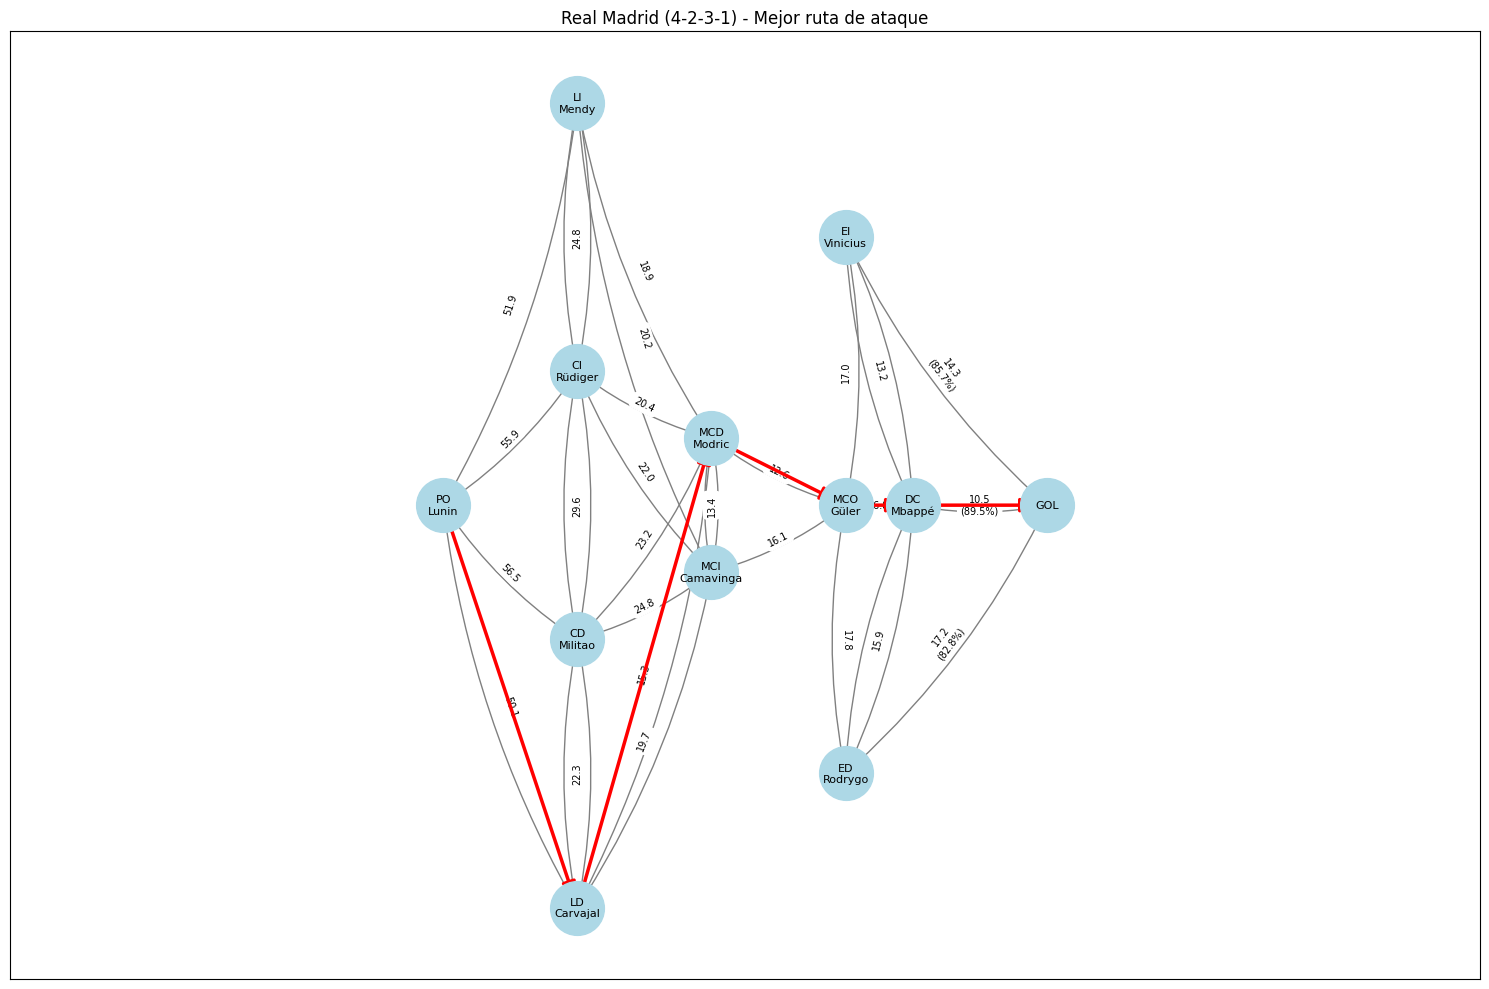


Mejor ruta encontrada:
PO (Lunin) --(50.1)--> LD (Carvajal) --(15.3)--> MCD (Modric) --(12.6)--> MCO (Güler) --(16.8)--> DC (Mbappé) --(10.5)--> G [Prob. Gol: 89.5%]
Peso total de la ruta: 105.4
Probabilidad de gol para el tiro final: 89.5%


In [ ]:
def main():
    print("\nGenerando grafo con estadísticas...")
    graph_data, goal_probabilities = generate_graph_data()

    print("\nEjecutando algoritmo ACO...")
    best_path, final_swarm = ACO(
        agents=15,
        graph=graph_data,
        is_start=is_start,
        transitions=12,
        tau=1.5,
        ro=0.15,
        is_goal=is_goal,
        iterations=100,
        print_iter=20
    )

    print("\nVisualizando resultados...")
    visualize_graph(graph_data, best_path, goal_probabilities)

    if best_path:
        print("\nMejor ruta encontrada:")
        total_weight = 0
        for i in range(len(best_path)-1):
            for from_pos, to_pos, weight in graph_data:
                if from_pos == best_path[i] and to_pos == best_path[i+1]:
                    total_weight += weight
                    player = next(name for name, pos in PLAYER_POSITIONS.items() if pos == from_pos)

                    # Si es un tiro a gol, mostrar la probabilidad
                    if to_pos == "G":
                        prob = goal_probabilities.get((from_pos, to_pos), 0) * 100
                        print(f"{from_pos} ({player}) --({weight:.1f})--> {to_pos} [Prob. Gol: {prob:.1f}%]", end="")
                    else:
                        print(f"{from_pos} ({player}) --({weight:.1f})--> ", end="")
                    break

        if best_path[-1] != "G":
            print(f"{best_path[-1]}")

        print(f"\nPeso total de la ruta: {total_weight:.1f}")

        # Calcular probabilidad de gol para la ruta completa
        if best_path[-1] == "G":
            final_shot = (best_path[-2], "G")
            final_prob = goal_probabilities.get(final_shot, 0) * 100
            print(f"Probabilidad de gol para el tiro final: {final_prob:.1f}%")

    return best_path, final_swarm, graph_data, goal_probabilities

if __name__ == "__main__":
    best_path, final_swarm, graph_data, goal_probabilities = main()

# **Con CR7**

In [ ]:
# Posiciones de los jugadores
PLAYER_POSITIONS = {
    "Lunin" : "PO",
    "Carvajal" : "LD",
    "Militao" : "CI",
    "Rüdiger" : "CD",
    "Mendy" : "LI",
    "Camavinga" : "MI",
    "Modric" : "MC",
    "Güler" : "MD",
    "Vinicius" : "EI",
    "Ronaldo" : "DC",
    "Rodrygo" : "ED"
}

In [ ]:
def generate_graph_data():
    graph_data = []

    # Definir las conexiones posibles con los jugadores asignados
    connections = [
        # Desde el portero
        ("PO", "LI", "Lunin", "long"),
        ("PO", "CI", "Lunin", "short"),
        ("PO", "CD", "Lunin", "short"),
        ("PO", "LD", "Lunin", "long"),

        # Desde defensas
        ("LI", "MI", "Mendy", "short"),
        ("LI", "MC", "Mendy", "long"),
        ("LI", "CI", "Mendy", "short"),

        ("CI", "MI", "Militao", "short"),
        ("CI", "MC", "Militao", "short"),
        ("CI", "CD", "Militao", "short"),
        ("CI", "LI", "Militao", "short"),

        ("CD", "MD", "Rüdiger", "short"),
        ("CD", "MC", "Rüdiger", "short"),
        ("CD", "LD", "Rüdiger", "short"),
        ("CD", "CI", "Rüdiger", "short"),

        ("LD", "MD", "Carvajal", "short"),
        ("LD", "MC", "Carvajal", "long"),
        ("LD", "CD", "Carvajal", "short"),

        # Desde mediocampo
        ("MI", "EI", "Camavinga", "short"),
        ("MI", "DC", "Camavinga", "short"),
        ("MI", "MC", "Camavinga", "short"),

        ("MC", "EI", "Modric", "long"),
        ("MC", "DC", "Modric", "short"),
        ("MC", "ED", "Modric", "long"),
        ("MC", "MI", "Modric", "short"),
        ("MC", "MD", "Modric", "short"),

        ("MD", "ED", "Güler", "short"),
        ("MD", "DC", "Güler", "short"),
        ("MD", "MC", "Güler", "short"),

        # Desde delanteros
        ("EI", "G", "Vinicius", "shoot"),
        ("EI", "DC", "Vinicius", "short"),

        ("DC", "G", "Ronaldo", "shoot"),
        ("DC", "EI", "Ronaldo", "short"),
        ("DC", "ED", "Ronaldo", "short"),

        ("ED", "G", "Rodrygo", "shoot"),
        ("ED", "DC", "Rodrygo", "short")
    ]

    for from_pos, to_pos, player, pass_type in connections:
        from_stats = PLAYER_STATS[player]

        if to_pos != "G":  # Si no es tiro a gol
            # Encontrar el jugador que recibe el pase
            to_player = next(name for name, pos in PLAYER_POSITIONS.items() if pos == to_pos)
            to_stats = PLAYER_STATS[to_player]

            # Calcular el peso considerando ambos jugadores
            weight = calculate_pass_weight(from_stats, to_stats, pass_type)

        else:  # Si es tiro a gol
            prob_goal = calculate_goal_probability(from_stats)
            goal_probabilities[(from_pos, to_pos)] = prob_goal
            weight = 100 - (prob_goal * 100)

        graph_data.append((from_pos, to_pos, weight))

    return graph_data, goal_probabilities

In [ ]:
def visualize_graph(graph_edges, best_path=None, goal_probabilities=None):
    G = nx.DiGraph()

    for start, end, weight in graph_edges:
        G.add_edge(start, end, weight=weight)

    pos = {
        'PO': (0, 0),    # Portero
        'LI': (2, 4),    # Lateral izquierdo
        'CI': (2, 2),    # Central izquierdo
        'CD': (2, -2),   # Central derecho
        'LD': (2, -4),   # Lateral derecho
        'MI': (4, 2),    # Medio centro izquierdo
        'MC': (4, 0),    # Medio centro
        'MD': (4, -2),   # Medio centro derecho
        'EI': (6, 2),    # Extremo izquierdo
        'DC': (6, 0),    # Delantero
        'ED': (6, -2),   # Extremo derecho
        'G': (8, 0)      # Gol
    }

    plt.figure(figsize=(15, 10))

    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1,
                          arrowsize=20, connectionstyle='arc3, rad=0.1')

    nx.draw_networkx_nodes(G, pos, node_color='lightblue',
                          node_size=1500)

    labels = {}
    for pos_code, position in pos.items():
        player_name = next((name for name, pos in PLAYER_POSITIONS.items() if pos == pos_code), pos_code)
        if pos_code != 'G':
            labels[pos_code] = f"{pos_code}\n{player_name}"
        else:
            labels[pos_code] = "GOL"

    nx.draw_networkx_labels(G, pos, labels, font_size=8)

    # Modificar las etiquetas de las aristas para incluir probabilidades de gol
    edge_labels = {}
    for (start, end), weight in nx.get_edge_attributes(G, 'weight').items():
        if end == 'G' and goal_probabilities:
            prob = goal_probabilities.get((start, end), 0) * 100
            edge_labels[(start, end)] = f"{weight:.1f}\n({prob:.1f}%)"
        else:
            edge_labels[(start, end)] = f"{weight:.1f}"

    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=7)

    if best_path:
        path_edges = list(zip(best_path[:-1], best_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                             edge_color='red', width=2.5,
                             arrowsize=20)

    plt.title("Real Madrid (4-2-3-1) - Mejor ruta de ataque")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def is_start(node):
    return node == "PO"

def is_goal(node):
    return node == "G"


Generando grafo con estadísticas...

Ejecutando algoritmo ACO...

Iteración 20
Mejor camino encontrado: ['PO', 'LD', 'MC', 'DC', 'G']
Costo: 76.62

Iteración 40
Mejor camino encontrado: ['PO', 'LD', 'MC', 'DC', 'G']
Costo: 76.62

Iteración 60
Mejor camino encontrado: ['PO', 'LD', 'MC', 'DC', 'G']
Costo: 76.62

Iteración 80
Mejor camino encontrado: ['PO', 'LD', 'MC', 'DC', 'G']
Costo: 76.62

Iteración 100
Mejor camino encontrado: ['PO', 'LD', 'MC', 'DC', 'G']
Costo: 76.62

Visualizando resultados...


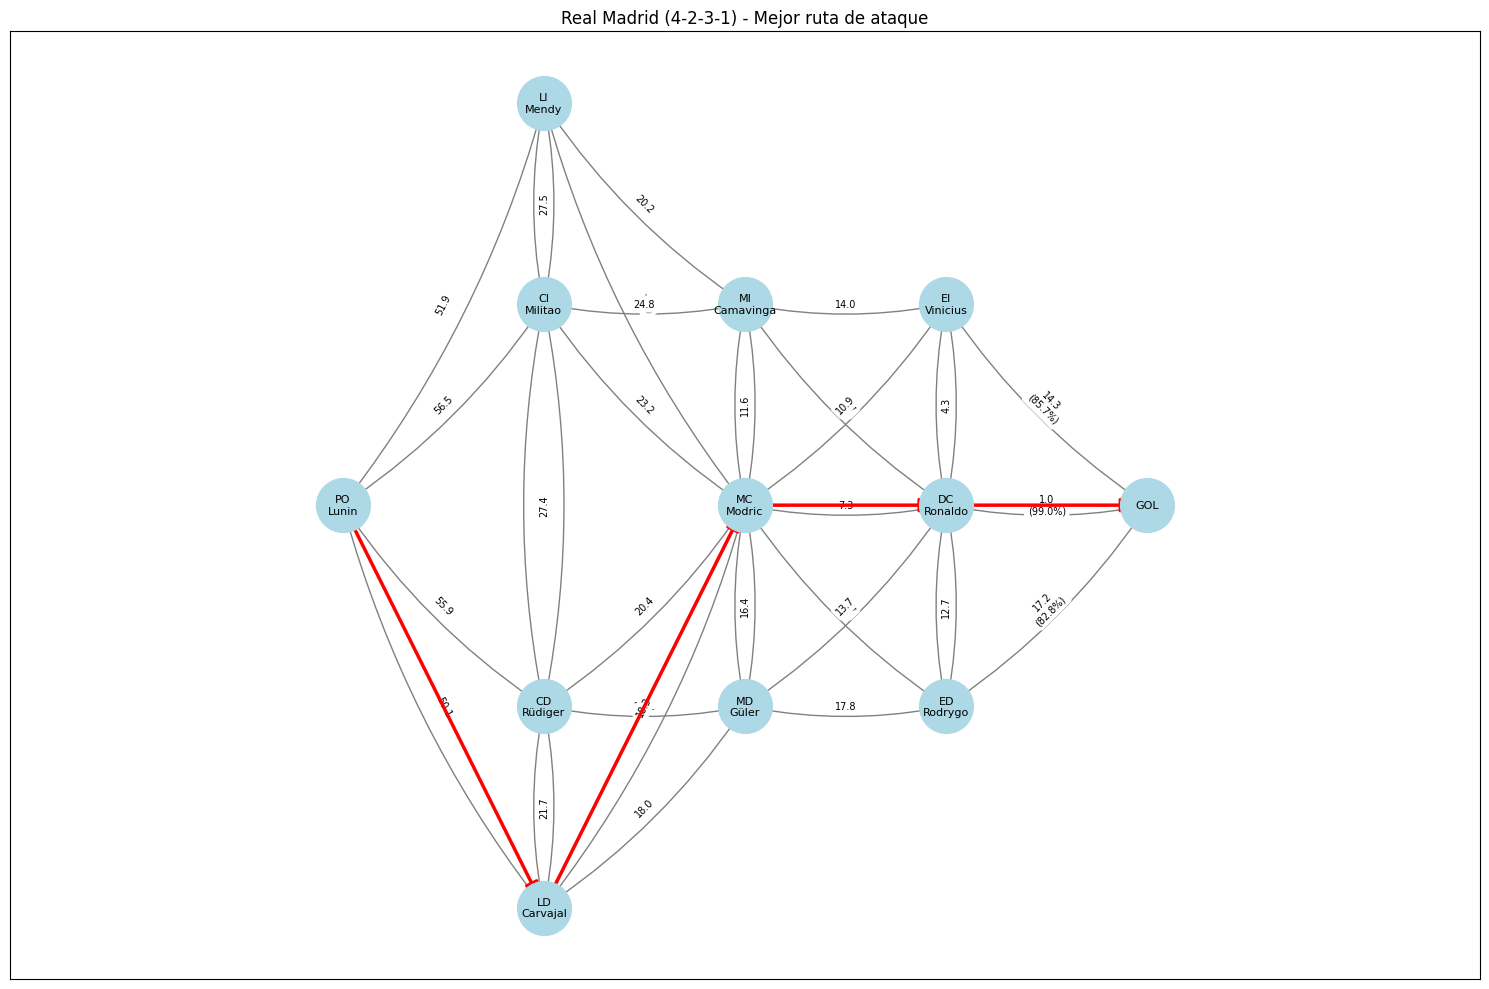


Mejor ruta encontrada:
PO (Lunin) --(50.1)--> LD (Carvajal) --(18.3)--> MC (Modric) --(7.3)--> DC (Ronaldo) --(1.0)--> G [Prob. Gol: 99.0%]
Peso total de la ruta: 76.6
Probabilidad de gol para el tiro final: 99.0%


In [ ]:
def main():
    print("\nGenerando grafo con estadísticas...")
    graph_data, goal_probabilities = generate_graph_data()

    print("\nEjecutando algoritmo ACO...")
    best_path, final_swarm = ACO(
        agents=15,
        graph=graph_data,
        is_start=is_start,
        transitions=12,
        tau=1.5,
        ro=0.15,
        is_goal=is_goal,
        iterations=100,
        print_iter=20
    )

    print("\nVisualizando resultados...")
    visualize_graph(graph_data, best_path, goal_probabilities)

    if best_path:
        print("\nMejor ruta encontrada:")
        total_weight = 0
        for i in range(len(best_path)-1):
            for from_pos, to_pos, weight in graph_data:
                if from_pos == best_path[i] and to_pos == best_path[i+1]:
                    total_weight += weight
                    player = next(name for name, pos in PLAYER_POSITIONS.items() if pos == from_pos)

                    # Si es un tiro a gol, mostrar la probabilidad
                    if to_pos == "G":
                        prob = goal_probabilities.get((from_pos, to_pos), 0) * 100
                        print(f"{from_pos} ({player}) --({weight:.1f})--> {to_pos} [Prob. Gol: {prob:.1f}%]", end="")
                    else:
                        print(f"{from_pos} ({player}) --({weight:.1f})--> ", end="")
                    break

        if best_path[-1] != "G":
            print(f"{best_path[-1]}")

        print(f"\nPeso total de la ruta: {total_weight:.1f}")

        # Calcular probabilidad de gol para la ruta completa
        if best_path[-1] == "G":
            final_shot = (best_path[-2], "G")
            final_prob = goal_probabilities.get(final_shot, 0) * 100
            print(f"Probabilidad de gol para el tiro final: {final_prob:.1f}%")

    return best_path, final_swarm, graph_data, goal_probabilities

if __name__ == "__main__":
    best_path, final_swarm, graph_data, goal_probabilities = main()